In [1]:
import requests
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)',
    'Accept-Language': 'en-US,en;q=0.9',
    'Referer': 'https://www.google.com'
}

resp = requests.get(url, headers=headers)
print(resp.status_code)          # should be 200 if request succeeded
html = resp.text

# parse tables from the downloaded HTML
tables = pd.read_html(html)
df = tables[0]   # pick the first table (inspect if needed)
df.head()


200


C:\Users\Asus\AppData\Local\Temp\ipykernel_15344\1758911803.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,680985,5.1%,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,637959,11.0%,1556000,"Seattle, Washington"
2,3,UnitedHealth Group,Healthcare,400278,7.7%,400000,"Minnetonka, Minnesota"
3,4,Apple,Electronics industry,391035,2.0%,164000,"Cupertino, California"
4,5,CVS Health,Healthcare,372809,4.2%,259500,"Woonsocket, Rhode Island"


In [2]:
# Clean column names: remove extra spaces, lowercase everything
df.columns = df.columns.str.strip().str.lower()
df.head()


,rank,name,industry,revenue (usd millions),revenue growth,employees,headquarters
0,1,Walmart,Retail,680985,5.1%,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,637959,11.0%,1556000,"Seattle, Washington"
2,3,UnitedHealth Group,Healthcare,400278,7.7%,400000,"Minnetonka, Minnesota"
3,4,Apple,Electronics industry,391035,2.0%,164000,"Cupertino, California"
4,5,CVS Health,Healthcare,372809,4.2%,259500,"Woonsocket, Rhode Island"


In [3]:
# Remove commas and convert revenue to numeric
df['revenue (usd millions)'] = (
    df['revenue (usd millions)']
    .replace(',', '', regex=True)
    .astype(float)
)

df.dtypes  # check column types


rank                        int64
name                       object
industry                   object
revenue (usd millions)    float64
revenue growth             object
employees                   int64
headquarters               object
dtype: object

In [4]:
# Sort by revenue in descending order and get top 10
top10 = df.sort_values(by='revenue (usd millions)', ascending=False).head(10)

top10[['rank', 'name', 'revenue (usd millions)']]


,rank,name,revenue (usd millions)
0,1,Walmart,680985.0
1,2,Amazon,637959.0
2,3,UnitedHealth Group,400278.0
3,4,Apple,391035.0
4,5,CVS Health,372809.0
5,6,Berkshire Hathaway,371433.0
6,7,Alphabet,350018.0
7,8,ExxonMobil,349595.0
8,9,McKesson Corporation,308951.0
9,10,Cencora,293959.0


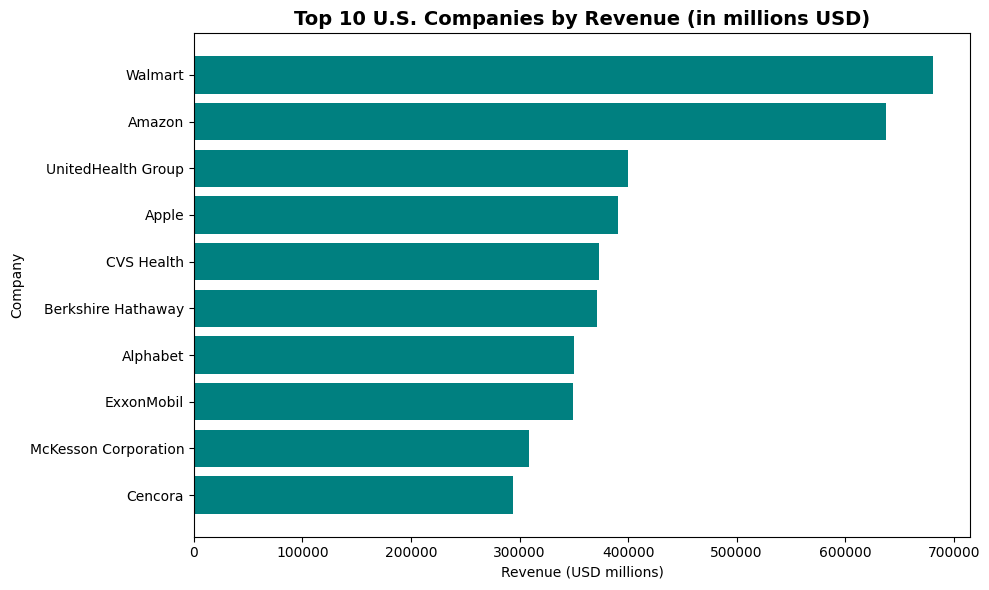

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top10['name'], top10['revenue (usd millions)'], color='teal')
plt.gca().invert_yaxis()  # largest on top

plt.title('Top 10 U.S. Companies by Revenue (in millions USD)', fontsize=14, weight='bold')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


In [6]:
top10.to_csv('top10_us_companies_by_revenue.csv', index=False)


NameError: name 'df' is not defined